In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

This notebook creates the plots that compare values across the different datasets in one plot.

## Analysis
Metrics from our model are from the experiments that we ran for this exercise. Metrics for best performing SK learn models are taken from the raw data from the last exercise. Metrics for the default sk learn implementation where run in slightly rewritten notebooks from this exercise.

In [2]:
performances_loan = {
    'model_name': ['MLP_ours', 'MLP_sk_best', 'MLP_sk_default', 'DT_best', 'DT_default'],
    'Accuracy': [0.8655, 0.866, 0.792 , 0.983 , 0.982],
    'Precision': [0.7201, 0.740, 0.578, 0.947, 0.921],
    'Recall': [0.711, 0.760, 0.567, 0.958, 0.933],
    'F-Score': [0.713, 0.747, 0.573, 0.953, 0.926],
    'TrainingTime': [1213, 112, 37.7, 0.302, 0.298],
    'Dataset': ['Loan']*5
}
performances_breast = {
    'model_name': ['MLP_ours', 'MLP_sk_best', 'MLP_sk_default', 'DT_best', 'DT_default'],
    'Accuracy': [0.98, 1.0,  0.96, 0.939 , 0.86],
    'Precision': [0.9848484848484849, 1.0, 0.957, 0.926, 0.851],
    'Recall': [0.9722222222222222, 1.0, 0.957, 0.938, 0.842],
    'F-Score': [0.9780219780219781, 1.0, 0.957 , 0.931, 0.846],
    'TrainingTime': [1.2, 0.384, 0.375, 0.014, 0.01],
    'Dataset': ['BreastCancer']*5
}
performances_fertility = {
    'model_name': ['MLP_ours', 'MLP_sk_best', 'MLP_sk_default', 'DT_best', 'DT_default'],
    'Accuracy': [0.5, 0.55, 0.65, 0.8, 0.8],
    'Precision': [0.5, 0.510, 0.433, 0.594, 0.594],
    'Recall': [0.5, 0.528, 0.361, 0.667, 0.667],
    'F-Score': [0.405, 0.436, 0.393, 0.608, 0.608],
    'TrainingTime': [1.6, 0.453, 0.473, 0.021, 0.010],
    'Dataset': ['Fertility']*5
}

performance_loan_df = pd.DataFrame(performances_loan)
performance_breast_df = pd.DataFrame(performances_breast)
performance_fertility_df = pd.DataFrame(performances_fertility)
performances_df = pd.concat([performance_fertility_df, performance_loan_df, performance_breast_df], ignore_index=True, axis=0)
performances_df

,model_name,Accuracy,Precision,Recall,F-Score,TrainingTime,Dataset
0,MLP_ours,0.5000,0.500000,0.500000,0.405000,1.600,Fertility
1,MLP_sk_best,0.5500,0.510000,0.528000,0.436000,0.453,Fertility
2,MLP_sk_default,0.6500,0.433000,0.361000,0.393000,0.473,Fertility
3,DT_best,0.8000,0.594000,0.667000,0.608000,0.021,Fertility
4,DT_default,0.8000,0.594000,0.667000,0.608000,0.010,Fertility
5,MLP_ours,0.8655,0.720100,0.711000,0.713000,1213.000,Loan
6,MLP_sk_best,0.8660,0.740000,0.760000,0.747000,112.000,Loan
7,MLP_sk_default,0.7920,0.578000,0.567000,0.573000,37.700,Loan
8,DT_best,0.9830,0.947000,0.958000,0.953000,0.302,Loan
9,DT_default,0.9820,0.921000,0.933000,0.926000,0.298,Loan


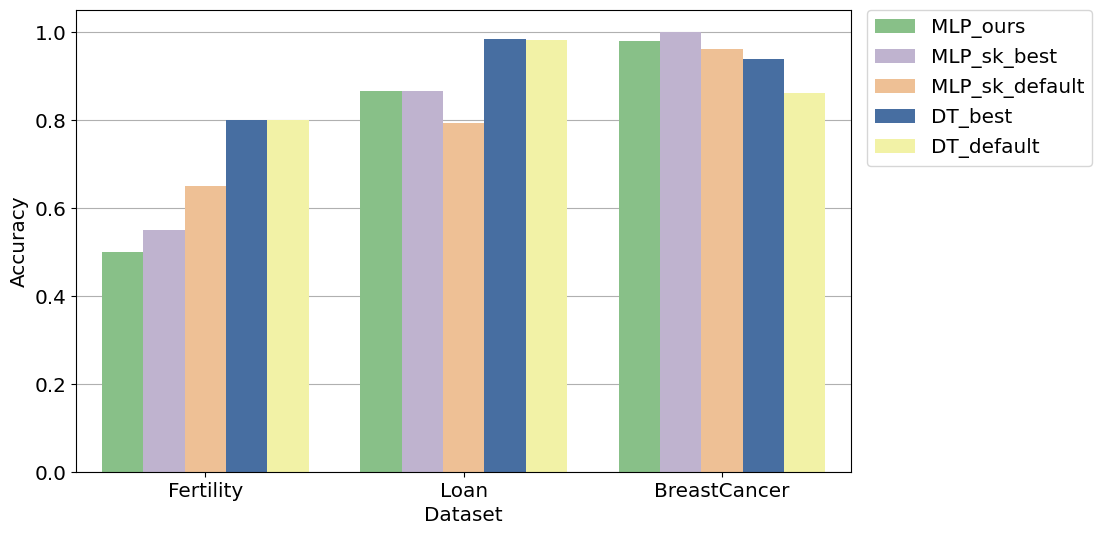

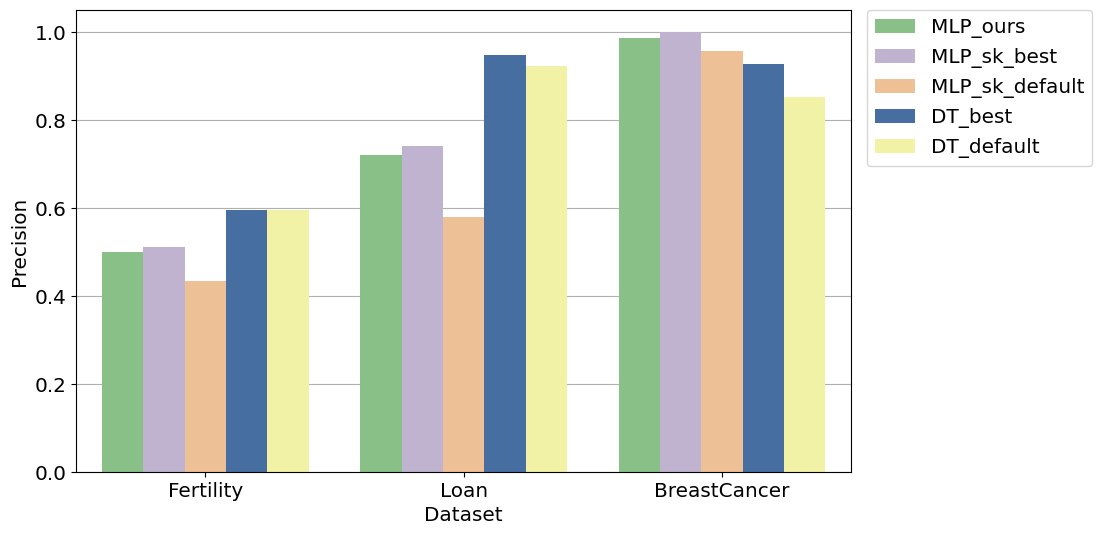

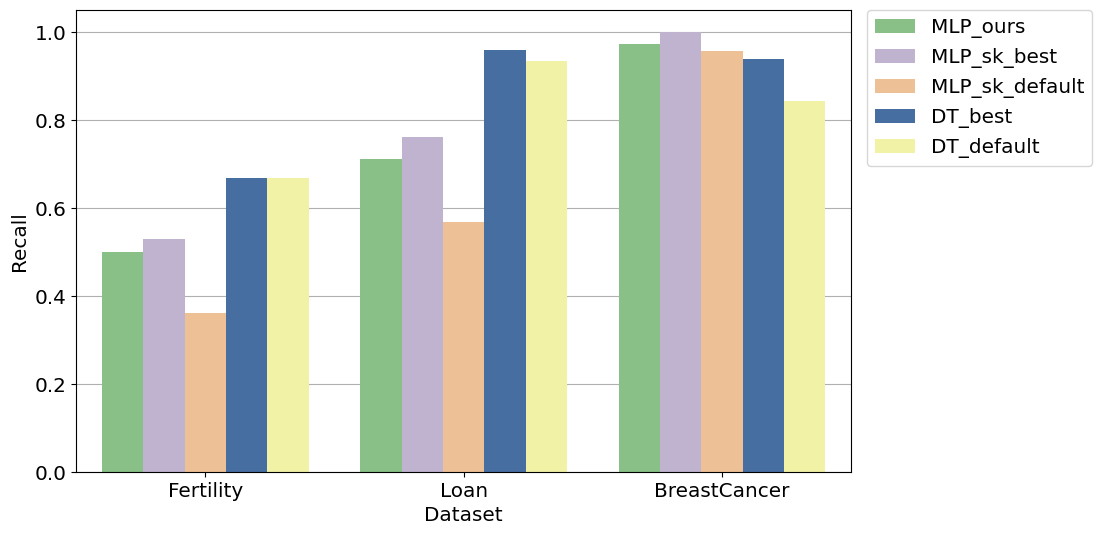

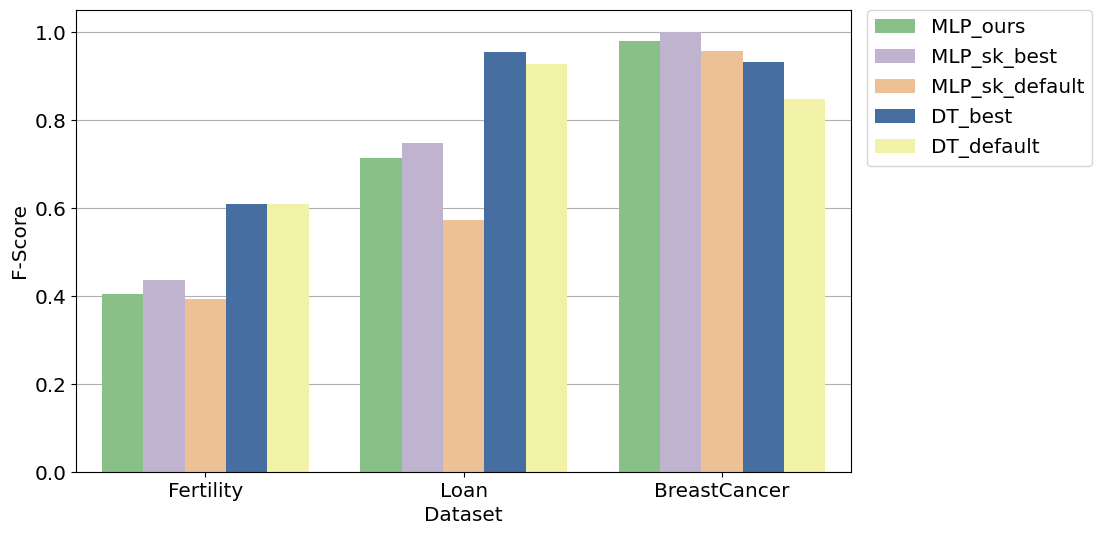

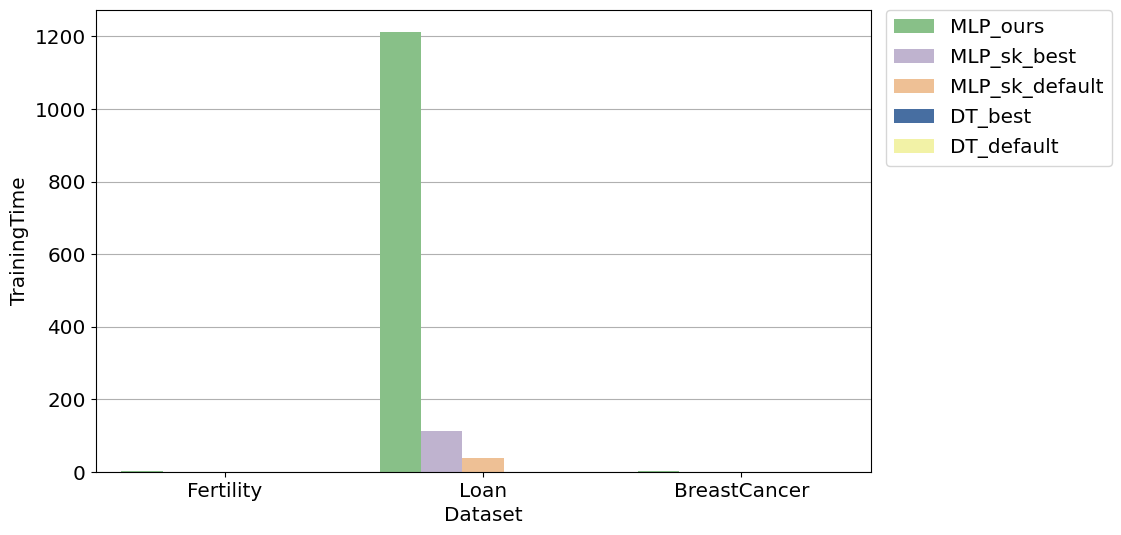

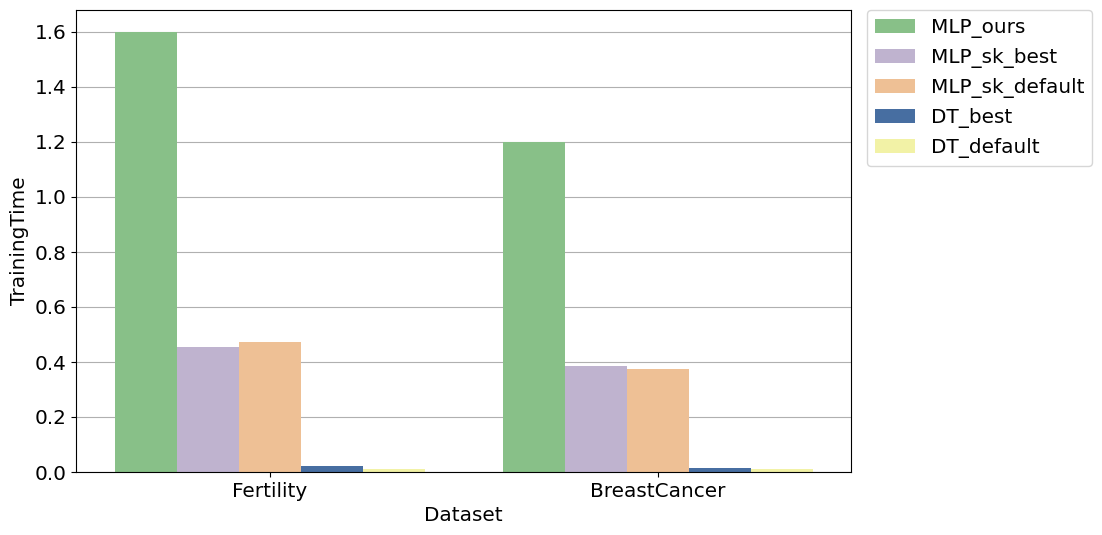

In [3]:
color = [(127,201,127),(190,174,212),(253,192,134),(56,108,176),(255,255,153)]
for i, rgb in enumerate(color):
    r, g, b = rgb
    color[i] = r/255.0, g/255.0, b/255.0
plt.rcParams['axes.axisbelow'] = True

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.figure(figsize=(10,6))
sns.barplot(data=performances_df, x="Dataset", y="Accuracy", hue='model_name',  palette=color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y")
plt.savefig("plots/accuracy.svg", bbox_inches='tight')

plt.figure(figsize=(10,6))
sns.barplot(data=performances_df, x="Dataset", y="Precision", hue='model_name', palette=color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y")
plt.savefig("plots/precision.svg", bbox_inches='tight')

plt.figure(figsize=(10,6))
sns.barplot(data=performances_df, x="Dataset", y="Recall", hue='model_name',  palette=color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y")
plt.savefig("plots/recall.svg", bbox_inches='tight')

plt.figure(figsize=(10,6))
sns.barplot(data=performances_df, x="Dataset", y="F-Score", hue='model_name',  palette=color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y")
plt.savefig("plots/f_score.svg", bbox_inches='tight')

plt.figure(figsize=(10,6))
sns.barplot(data=performances_df, x="Dataset", y="TrainingTime", hue='model_name',  palette=color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y")
plt.savefig("plots/TrainingTimeAll.svg", bbox_inches='tight')

plt.figure(figsize=(10,6))
sns.barplot(data=performances_df[performances_df.Dataset != "Loan"], x="Dataset", y="TrainingTime", hue='model_name',  palette=color)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis="y")
plt.savefig("plots/TrainingTimeNoLoan.svg", bbox_inches='tight')